In [1]:
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
import astropy.units as u
import sys
import numpy as np
import matplotlib.pyplot as plt

def filter(table, key, param, lim):
    col = key.index(param)

    for row in range(tableRows(table) - 1, -1, -1):
        if table[row][col] < lim[0] or table[row][col] > lim[1]:
            table = np.delete(table, row, 0)
    return table


def tableRows(table):
    return int(table.size / table[0].size)


def isochrones(filename, dist):
    iso = np.array(np.loadtxt(filename, dtype = 'float', skiprows = 13, usecols = (28, 29, 30)))
    isoB = np.array([])
    isoR = np.array([])
    isoG = np.array([])

    for row in range(tableRows(iso)):
        isoG = np.append(isoG, iso[row][0] + (dist / 1000))
        isoB = np.append(isoB, iso[row][1] + (dist / 2000))
        isoR = np.append(isoR, iso[row][2])

    return np.array([isoB, isoR, isoG])

In [2]:
#viz = Vizier(columns=['RA_ICRS', 'DE_ICRS', 'Plx', 'pmRA', 'pmDE', 'Gmag', 'BPmag', 'RPmag', 'e_Plx'], catalog = "I/350/gaiaedr3")
#viz.ROW_LIMIT = -1
#vizTable = viz.query_region("pleiades", radius = 65 * u.arcmin)

In [3]:
#original_stdout = sys.stdout
#with open('gaiaPle.txt', 'w') as f:
#    sys.stdout = f
#    vizTable[0].pprint(-1, -1)
#sys.stdout = original_stdout

In [4]:
table = np.array(np.loadtxt("gaiaPle.txt", dtype = 'str', skiprows = 3))
numRows = int(table.size / table[0].size)

for row in range(numRows - 1, -1, -1):
    for col in range(table[0].size):
        if table[row][col] == '--':
            table = np.delete(table, row, 0)
            break
            
tableOrig = table

In [5]:
key = ['RA_ICRS', 'DE_ICRS', 'Plx', 'pmRA', 'pmDE', 'Gmag', 'BPmag', 'RPmag', 'e_Plx']
table = table.astype(float)

In [6]:
RA = np.array([])
DE = np.array([])
Plx = np.array([])
pmRA = np.array([])
pmDE = np.array([])
BPmagOrig = np.array([])
RPmagOrig = np.array([])
GmagOrig = np.array([])
e_Plx = np.array([])

for row in range(tableRows(table)):
    Plx = np.append(Plx, table[row][key.index("Plx")])
    pmRA = np.append(pmRA, table[row][key.index("pmRA")])
    pmDE = np.append(pmDE, table[row][key.index("pmDE")])
    BPmagOrig = np.append(BPmagOrig, table[row][key.index("BPmag")])
    RPmagOrig = np.append(RPmagOrig, table[row][key.index("RPmag")])
    GmagOrig = np.append(GmagOrig, table[row][key.index("Gmag")])
    e_Plx = np.append(e_Plx, table[row][key.index("e_Plx")])

Text(0, 0.5, 'Number of stars')

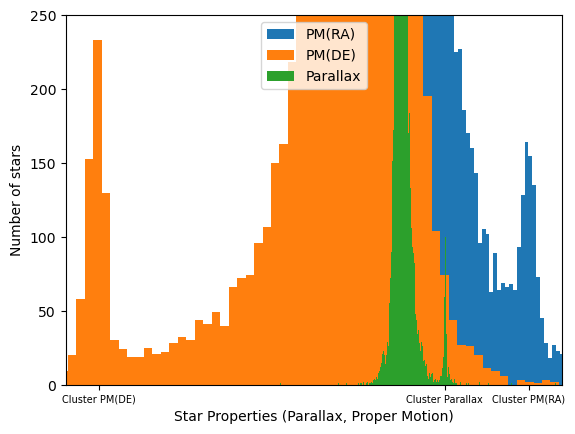

In [7]:
plt.hist(pmRA, 1000, label = "PM(RA)")
plt.hist(pmDE, 1000, label = "PM(DE)")
plt.hist(Plx, 1000, label = "Parallax")
plt.xlim(-50, 25)
plt.ylim(0, 250)
plt.xticks([7.3, 20, -45], ["Cluster Parallax", "Cluster PM(RA)", "Cluster PM(DE)"], fontsize = 7)
plt.legend(loc='upper center')
plt.xlabel("Star Properties (Parallax, Proper Motion)")
plt.ylabel("Number of stars")

Text(0.5, 1.0, 'Proper Motions')

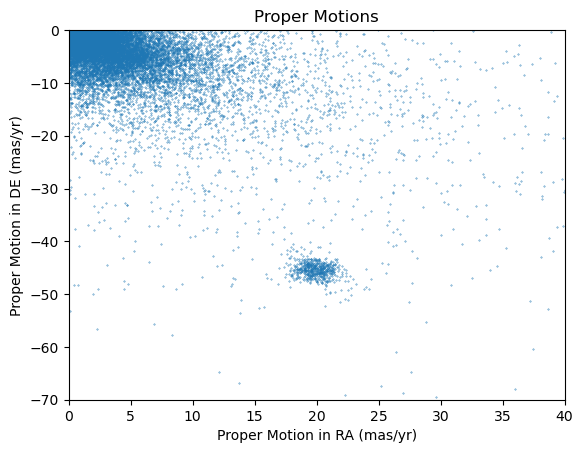

In [8]:
plt.scatter(pmRA, pmDE, s = 0.1)
plt.xlim(0, 40)
plt.ylim(-70, 0)
plt.xlabel("Proper Motion in RA (mas/yr)")
plt.ylabel("Proper Motion in DE (mas/yr)")
plt.title("Proper Motions")

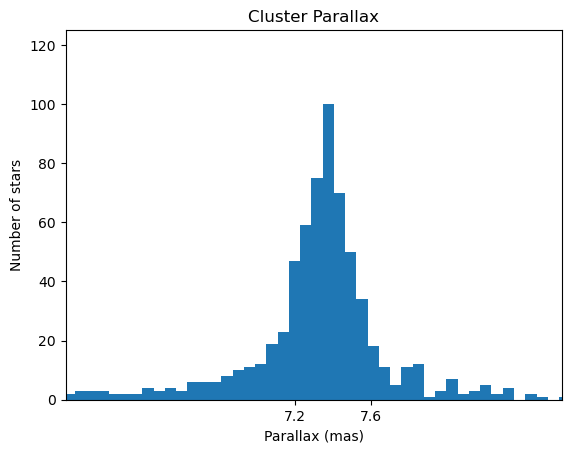

In [9]:
plt.hist(Plx, 1000)
plt.xlim(6, 8.6)
plt.ylim(0, 125)
plt.xticks([7.2, 7.6])
plt.xlabel("Parallax (mas)")
plt.ylabel("Number of stars")
plt.title("Cluster Parallax")
Plxrng = [7.2, 7.6]
Plxavg = 7.4

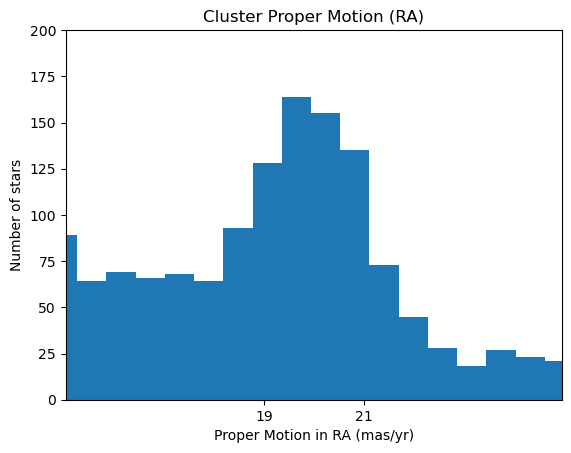

In [10]:
plt.hist(pmRA, 1000)
plt.xlim(15, 25)
plt.ylim(0, 200)
plt.xticks([19, 21])
plt.xlabel("Proper Motion in RA (mas/yr)")
plt.ylabel("Number of stars")
plt.title("Cluster Proper Motion (RA)")
pmRArng = [19, 21]

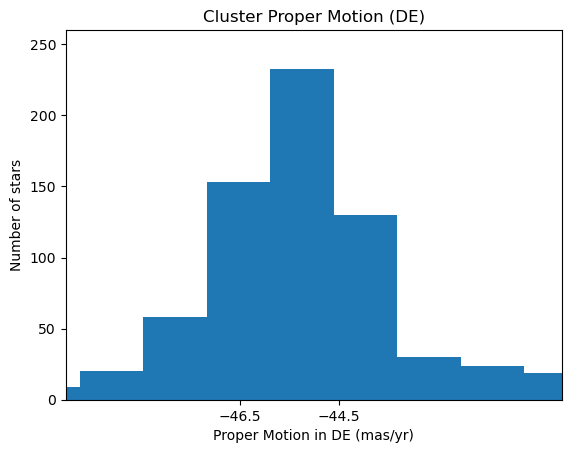

In [11]:
plt.hist(pmDE, 1000)
plt.xlim(-50, -40)
plt.ylim(0, 260)
plt.xticks([-46.5, -44.5])
plt.xlabel("Proper Motion in DE (mas/yr)")
plt.ylabel("Number of stars")
plt.title("Cluster Proper Motion (DE)")
pmDErng = [-46.5, -44.5]

In [12]:
table = filter(table, key, "Plx", Plxrng)
table = filter(table, key, "pmRA", pmRArng)
table = filter(table, key, "pmDE", pmDErng)

for row in range(tableRows(table)):
    if (table[row][key.index("e_Plx")] / table[row][key.index("Plx")]) > 0.5:
        table = np.delete(table, row, 0)

print(tableRows(table))

180


In [13]:
BPmag = np.array([])
RPmag = np.array([])
Gmag = np.array([])
PlxCluster = np.array([])
RA = np.array([])
DE = np.array([])

for row in range(tableRows(table)):
    BPmag = np.append(BPmag, table[row][key.index("BPmag")])
    RPmag = np.append(RPmag, table[row][key.index("RPmag")])
    Gmag = np.append(Gmag, table[row][key.index("Gmag")])
    PlxCluster = np.append(PlxCluster, table[row][key.index("Plx")])
    RA = np.append(RA, table[row][key.index("RA_ICRS")])
    DE = np.append(DE, table[row][key.index("DE_ICRS")])

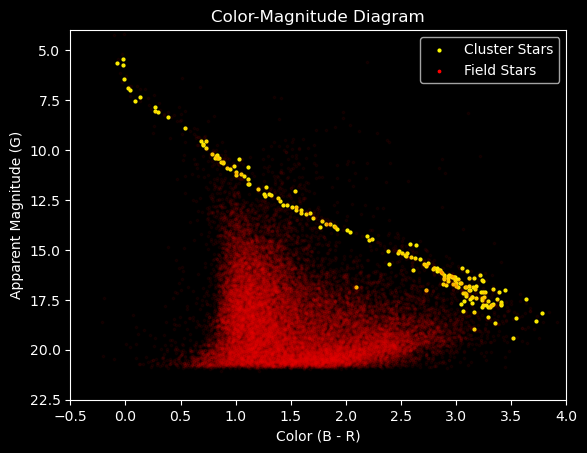

In [14]:
plt.style.use('dark_background')
plt.scatter(BPmag - RPmag, Gmag, s = 4, color = "yellow", label = "Cluster Stars")
plt.scatter(BPmagOrig - RPmagOrig, GmagOrig, s = 3, color = "r", alpha = 0.05, label = "Field Stars")
plt.ylim(22.5, 4)
plt.xlim(-0.5, 4)
plt.xlabel("Color (B - R)")
plt.ylabel("Apparent Magnitude (G)")
plt.title("Color-Magnitude Diagram")
leg = plt.legend(loc = "upper right")
for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [15]:
distClusterAvg = 1 / (np.sum(PlxCluster) / PlxCluster.size) * 1000
print(distClusterAvg)
print(1 / (np.amin(PlxCluster)) * 1000)
print(1 / (np.amax(PlxCluster)) * 1000)

135.53956607007925
138.813698135732
131.63437236731255


In [16]:
print(distClusterAvg * np.sin(np.deg2rad(np.amax(RA) - np.amin(RA))))
print(distClusterAvg * np.sin(np.deg2rad(np.amax(DE) - np.amin(DE))))

5.217798605536367
4.892361627743582


In [17]:
iso105 = isochrones("./Isochrones/105Myrs.dat", distClusterAvg)
iso115 = isochrones("./Isochrones/115Myrs.dat", distClusterAvg)
iso125 = isochrones("./Isochrones/125Myrs.dat", distClusterAvg)
iso135 = isochrones("./Isochrones/135Myrs.dat", distClusterAvg)
iso145 = isochrones("./Isochrones/145Myrs.dat", distClusterAvg)
iso155 = isochrones("./Isochrones/155Myrs.dat", distClusterAvg)
iso165 = isochrones("./Isochrones/165Myrs.dat", distClusterAvg)
iso200 = isochrones("./Isochrones/200Myrs.dat", distClusterAvg)
iso135m = isochrones("./Isochrones/135Myrs_m.dat", distClusterAvg)

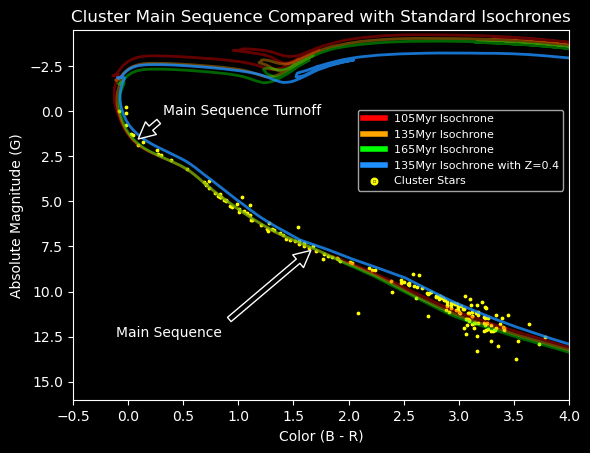

In [18]:
plt.plot(iso105[0] - iso105[1], iso105[2], color = "red", linewidth = 2, alpha = 0.4, label = "105Myr Isochrone")
plt.plot(iso135[0] - iso135[1], iso135[2], color = "orange", linewidth = 2, alpha = 0.4, label = "135Myr Isochrone")
plt.plot(iso165[0] - iso165[1], iso165[2], color = "lime", linewidth = 2, alpha = 0.4, label = "165Myr Isochrone")
plt.plot(iso135m[0] - iso135m[1], iso135m[2], color = "dodgerblue", linewidth = 2, alpha = 0.8, label = "135Myr Isochrone with Z=0.4")

plt.scatter(BPmag - RPmag, Gmag - 5 * np.log10(distClusterAvg / 10), s = 3, color = "yellow", label = "Cluster Stars")

plt.ylim(16, -4.5)
plt.xlim(-0.5, 4)
leg = plt.legend(loc='upper right', bbox_to_anchor=(0.5,0.3,0.5,0.5), prop={'size': 8})
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(4)
plt.xlabel("Color (B - R)")
plt.ylabel("Absolute Magnitude (G)")
plt.title("Cluster Main Sequence Compared with Standard Isochrones")
plt.annotate('Main Sequence Turnoff', xy=(0.08, 1.6),  xycoords='data',
            xytext=(0.5, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.annotate('Main Sequence', xy=(1.7, 7.5),  xycoords='data',
            xytext=(0.3, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
#plt.savefig('Q2_Getchel.pdf', dpi = 300)